In [2]:
import re
from datasets import load_dataset

In [2]:
dataset = load_dataset("ai4bharat/IndicCorpV2", "indiccorp_v2", split="hin_Deva", streaming=True)

for i, example in enumerate(dataset):
    print(example)
    if i == 5:
        break


{'text': 'लोगों को बिलों संबंधी सुविधा देना ही उनका काम'}
{'text': ''}
{'text': 'इनेलो 1987 में उस वक्त ऐसे ही दोराहे पर खड़ी थी, जब पूर्व उपप्रधानमंत्री देवीलाल ने अपने पुत्र ओमप्रकाश चौटाला को अपना राजनीतिक उत्तराधिकारी घोषित किया था। हालांकि तब पार्टी पर देवीलाल की मजबूत पकड़ के चलते पार्टी टूटने से बच गई थी। 1989 में देवीलाल केन्द्र की राजनीति में सक्रिय हो गए थे और उनके उपप्रधानमंत्री बनने के पश्चात् उनके तीन बेटों जगदीश सिंह, रणजीत सिंह और ओमप्रकाश चौटाला में से रणजीत और ओमप्रकाश के बीच हरियाणा में उनकी राजनीतिक विरासत को लेकर जंग शुरू हो गई थी। उन परिस्थितियों में देवीलाल ने कड़ा निर्णय लेते हुए पार्टी की बागडोर ओमप्रकाश चौटाला के हवाले कर दी थी, जिसके बाद रणजीत की बगावत का असर पार्टी, संगठन और उनकी सरकार पर भी पड़ा था। उस समय रणजीत की नाराजगी के चलते उनके समर्थन में कई कैबिनेट मंत्रियों ने इस्तीफे दे दिए थे किन्तु तब पार्टी सुप्रीमो चौ. देवीलाल की हरियाणा की जनता पर इतनी मजबूत पकड़ थी कि ओमप्रकाश चौटाला को उत्तराधिकारी बनाने के उनके फैसले का जनता के बीच कोई खास विरोध नहीं हुआ थ

In [16]:
data = []
for i, example in enumerate(dataset):
    # because there were alternate empyt rows in loaded dataset
    if(i%2==1):
        continue
    data.append(example["text"])
    if i >= 20:
        break

In [4]:
len(data[1].split(" "))

231

In [16]:
def sentence_tokenizer(data):
    sentences = []
    for d in data:
        sentences.extend(re.split(r"(?<=[.।?])\s+",d))
    return sentences

In [62]:
def sentence_count(data):
    cnt = 0
    for d in data:
        cnt += len(re.split(r"(?<=[.।?])\s+",d))

    return cnt


In [63]:
sentence_count(data)

29

In [17]:
sent = sentence_tokenizer(data)
print(sent)

['लोगों को बिलों संबंधी सुविधा देना ही उनका काम', 'इनेलो 1987 में उस वक्त ऐसे ही दोराहे पर खड़ी थी, जब पूर्व उपप्रधानमंत्री देवीलाल ने अपने पुत्र ओमप्रकाश चौटाला को अपना राजनीतिक उत्तराधिकारी घोषित किया था।', 'हालांकि तब पार्टी पर देवीलाल की मजबूत पकड़ के चलते पार्टी टूटने से बच गई थी।', '1989 में देवीलाल केन्द्र की राजनीति में सक्रिय हो गए थे और उनके उपप्रधानमंत्री बनने के पश्चात् उनके तीन बेटों जगदीश सिंह, रणजीत सिंह और ओमप्रकाश चौटाला में से रणजीत और ओमप्रकाश के बीच हरियाणा में उनकी राजनीतिक विरासत को लेकर जंग शुरू हो गई थी।', 'उन परिस्थितियों में देवीलाल ने कड़ा निर्णय लेते हुए पार्टी की बागडोर ओमप्रकाश चौटाला के हवाले कर दी थी, जिसके बाद रणजीत की बगावत का असर पार्टी, संगठन और उनकी सरकार पर भी पड़ा था।', 'उस समय रणजीत की नाराजगी के चलते उनके समर्थन में कई कैबिनेट मंत्रियों ने इस्तीफे दे दिए थे किन्तु तब पार्टी सुप्रीमो चौ.', 'देवीलाल की हरियाणा की जनता पर इतनी मजबूत पकड़ थी कि ओमप्रकाश चौटाला को उत्तराधिकारी बनाने के उनके फैसले का जनता के बीच कोई खास विरोध नहीं हुआ था लेकिन आज स्थि

In [17]:

def word_tokenizer(data):
    words = []

    # Define patterns
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    url_pattern = r'https?://[^\s]+|www\.[^\s]+'
    time_pattern = r'\d{1,2}\.\d{2}'  # 10.30
    number_pattern = r'[\d\u0966-\u096F]+'

    # Hindi and English words
    word_pattern = r'[\u0900-\u097F]+|[a-zA-Z]+'
    
    # Hindi + English punctuation, including danda (।)
    punc_pattern = r'[।.,!?;:()\'"“”‘’—–\-]'

    
    # Combine with priority: time first, then emails/URLs
    combined_pattern = f'{punc_pattern}|{time_pattern}|{email_pattern}|{url_pattern}|{word_pattern}|{number_pattern}'

    for sentence in data:
        tokens = re.findall(combined_pattern, sentence)
        words.extend(tokens)

    return words


In [18]:
word = word_tokenizer(data)

In [19]:
print(word[0])

लोगों


In [72]:

def word_count(data):
    cnt = 0

    # Define patterns
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    url_pattern = r'https?://[^\s]+|www\.[^\s]+'
    time_pattern = r'\d{1,2}\.\d{2}'  # 10.30
    number_pattern = r'[\d\u0966-\u096F]+'

    # Hindi and English words
    word_pattern = r'[\u0900-\u097F]+|[a-zA-Z]+'
    
    # Hindi + English punctuation, including danda (।)
    punc_pattern = r'[।.,!?;:()\'"“”‘’—–\-]'

    
    # Combine with priority: time first, then emails/URLs
    combined_pattern = f'{punc_pattern}|{time_pattern}|{email_pattern}|{url_pattern}|{word_pattern}|{number_pattern}'

    for sentence in data:
        tokens = re.findall(combined_pattern, sentence)
        cnt += len(tokens)

    return cnt


In [73]:
word_count(data)

661

In [4]:

def character_count(data):
    cnt = 0

    # Define patterns
    email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    url_pattern = r'https?://[^\s]+|www\.[^\s]+'
    time_pattern = r'\d{1,2}\.\d{2}'  # 10.30
    number_pattern = r'[\d\u0966-\u096F]+'

    # Hindi and English words
    word_pattern = r'[\u0900-\u097F]+|[a-zA-Z]+'
    
    # Hindi + English punctuation, including danda (।)
    punc_pattern = r'[।.,!?;:()\'"“”‘’—–\-]'

    
    # Combine with priority: time first, then emails/URLs
    combined_pattern = f'{punc_pattern}|{time_pattern}|{email_pattern}|{url_pattern}|{word_pattern}|{number_pattern}'

    for sentence in data:
        tokens = re.findall(combined_pattern, sentence)
        for char in tokens:
            cnt += len(char)

    return cnt


In [61]:
character_count(data)

2630

In [64]:
def avg_sentence_len(data):
    return word_count(data)/sentence_count(data)

In [65]:
avg_len_sentences(data)

90.6896551724138

In [75]:
def avg_word_len(data):
    return character_count(data)/word_count(data)

In [76]:
avg_word_len(data)

3.9788199697428137

In [77]:
def TTR_word(data):
    uniquecnt = len(set(word_tokenizer(data)))

    return uniquecnt/word_count(data)

In [78]:
TTR_word(data)

0.556732223903177

In [3]:


class TextStreamAnalyzer:
    def __init__(self, dataset_name="ai4bharat/IndicCorpV2", config="indiccorp_v2", split="hin_Deva"):
        self.dataset = load_dataset(dataset_name, config, split=split, streaming=True)

    def clean_text_stream(self, max_items=None):
        data = []
        for i, example in enumerate(self.dataset):
            if i % 2 == 1:
                continue
            data.append(example["text"])
            if max_items and i >= max_items:
                break
        return data

    def sentence_tokenizer(self, data):
        sentences = []
        for d in data:
            sentences.extend(re.split(r"(?<=[.।!?])\s+", d))
        return sentences

    def sentence_count(self, data):
        """
        Counts total number of sentences in the given data.
        """
        count = 0
        for d in data:
            count += len(re.split(r"(?<=[.।!?])\s+", d))
        return count
        
    def word_tokenizer(self,data):
        words = []
    
        # Define patterns
        email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
        url_pattern = r'https?://[^\s]+|www\.[^\s]+'
        time_pattern = r'\d{1,2}\.\d{2}'  # 10.30
        number_pattern = r'[\d\u0966-\u096F]+'
    
        # Hindi and English words
        word_pattern = r'[\u0900-\u097F]+|[a-zA-Z]+'
        
        # Hindi + English punctuation, including danda (।)
        punc_pattern = r'[।.,!?;:()\'"“”‘’—–\-]'
    
        
        # Combine with priority: time first, then emails/URLs
        combined_pattern = f'{punc_pattern}|{time_pattern}|{email_pattern}|{url_pattern}|{word_pattern}|{number_pattern}'
    
        for sentence in data:
            tokens = re.findall(combined_pattern, sentence)
            words.extend(tokens)
    
        return words

   
    

    
    def word_count(self,data):
        cnt = 0
    
        # Define patterns
        email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
        url_pattern = r'https?://[^\s]+|www\.[^\s]+'
        time_pattern = r'\d{1,2}\.\d{2}'  # 10.30
        year_pattern = r'^(?:०[१-९]|[१२][०-९]|३[०-१])[./-](?:०[१-९]|१[०-२])[./-](?:१९|२०)[०-९]{2}$'
        number_pattern = r'[\d\u0966-\u096F]+'
    
        # Hindi and English words
        word_pattern = r'[\u0900-\u097F]+|[a-zA-Z]+'
        
        # Hindi + English punctuation, including danda (।)
        punc_pattern = r'[।.,!?;:()\'"“”‘’—–\-]'
    
        
        # Combine with priority: time first, then emails/URLs
        combined_pattern = f'{punc_pattern}|{time_pattern}|{email_pattern}|{url_pattern}|{word_pattern}|{number_pattern}|{year_pattern}'
    
        for sentence in data:
            tokens = re.findall(combined_pattern, sentence)
            cnt += len(tokens)

        return cnt

    
    def character_count(self,data):
        cnt = 0
    
        # Define patterns
        email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
        url_pattern = r'https?://[^\s]+|www\.[^\s]+'
        time_pattern = r'\d{1,2}\.\d{2}'  # 10.30
        number_pattern = r'[\d\u0966-\u096F]+'
    
        # Hindi and English words
        word_pattern = r'[\u0900-\u097F]+|[a-zA-Z]+'
        
        # Hindi + English punctuation, including danda (।)
        punc_pattern = r'[।.,!?;:()\'"“”‘’—–\-]'
    
        
        # Combine with priority: time first, then emails/URLs
        combined_pattern = f'{punc_pattern}|{time_pattern}|{email_pattern}|{url_pattern}|{word_pattern}|{number_pattern}'
    
        for sentence in data:
            tokens = re.findall(combined_pattern, sentence)
            for char in tokens:
                cnt += len(char)
    
        return cnt

    def avg_sentence_len(self,data):
        return word_count(data)/sentence_count(data)
    def avg_word_len(self,data):
        return character_count(data)/word_count(data)

    def TTR_word(self,data):
        uniquecnt = len(set(word_tokenizer(data)))
        return uniquecnt/word_count(data)

In [4]:
analyzer = TextStreamAnalyzer()

# Stream and collect first 1000 examples
data = analyzer.clean_text_stream(max_items=10)

# Get sentence and word counts
sentence_total = analyzer.word_tokenizer(data)

print(sentence_total)

['लोगों', 'को', 'बिलों', 'संबंधी', 'सुविधा', 'देना', 'ही', 'उनका', 'काम', 'इनेलो', '1987', 'में', 'उस', 'वक्त', 'ऐसे', 'ही', 'दोराहे', 'पर', 'खड़ी', 'थी', ',', 'जब', 'पूर्व', 'उपप्रधानमंत्री', 'देवीलाल', 'ने', 'अपने', 'पुत्र', 'ओमप्रकाश', 'चौटाला', 'को', 'अपना', 'राजनीतिक', 'उत्तराधिकारी', 'घोषित', 'किया', 'था।', 'हालांकि', 'तब', 'पार्टी', 'पर', 'देवीलाल', 'की', 'मजबूत', 'पकड़', 'के', 'चलते', 'पार्टी', 'टूटने', 'से', 'बच', 'गई', 'थी।', '1989', 'में', 'देवीलाल', 'केन्द्र', 'की', 'राजनीति', 'में', 'सक्रिय', 'हो', 'गए', 'थे', 'और', 'उनके', 'उपप्रधानमंत्री', 'बनने', 'के', 'पश्चात्', 'उनके', 'तीन', 'बेटों', 'जगदीश', 'सिंह', ',', 'रणजीत', 'सिंह', 'और', 'ओमप्रकाश', 'चौटाला', 'में', 'से', 'रणजीत', 'और', 'ओमप्रकाश', 'के', 'बीच', 'हरियाणा', 'में', 'उनकी', 'राजनीतिक', 'विरासत', 'को', 'लेकर', 'जंग', 'शुरू', 'हो', 'गई', 'थी।', 'उन', 'परिस्थितियों', 'में', 'देवीलाल', 'ने', 'कड़ा', 'निर्णय', 'लेते', 'हुए', 'पार्टी', 'की', 'बागडोर', 'ओमप्रकाश', 'चौटाला', 'के', 'हवाले', 'कर', 'दी', 'थी', ',', 'जिसके', 

In [4]:
analyzer = TextStreamAnalyzer()

# Stream and collect first 10000 examples
data = analyzer.clean_text_stream(max_items=100000)

# Get sentence and word counts

word_total = analyzer.word_count(data)
word = analyzer.word_tokenizer(data)

print(f"Total Words: {word_total}")


Total Words: 3060771


In [5]:
word[0]

'लोगों'

In [6]:

frequency_map = {}


for words in word:
    if words in frequency_map:
       frequency_map[words] += 1
    else:
        frequency_map[words] = 1



In [7]:
items = list(frequency_map.items())

In [8]:
items.sort(key=lambda x: x[1], reverse=True)

In [9]:
num_to_print = 100
lis = []
# Print the first `num_to_print` items
print(f"First {num_to_print} entries of the frequency map:")
for i in range(num_to_print):
    if i < len(items):
        lis.append({items[i][1],items[i][0]})
        print(f"'{items[i][0]}': {items[i][1]}")
    else:
        break

First 100 entries of the frequency map:
'के': 118992
'में': 91497
'की': 72314
',': 65059
'को': 55683
'से': 52642
'ने': 40787
'का': 39204
'है': 38136
'और': 37943
'है।': 37457
'.': 36673
'पर': 33655
'कि': 27281
'भी': 22754
'-': 19600
'लिए': 18707
'एक': 17389
'कर': 16741
'इस': 16675
'नहीं': 15695
'हैं': 14175
'हैं।': 14100
'ही': 13480
'किया': 12657
'हो': 12316
'कहा': 10938
'करने': 10935
'साथ': 10473
'बाद': 9773
'यह': 9682
'तो': 9661
'गया': 9393
'रहे': 7719
'तक': 7618
')': 7601
'(': 7558
'हुए': 7043
'जा': 6844
'रहा': 6839
'अपने': 6738
'रही': 6622
'दिया': 6390
'पुलिस': 6365
'उन्होंने': 6036
'लोगों': 6034
''': 5906
'था': 5816
':': 5691
'लेकिन': 5685
'सरकार': 5520
'गई': 5437
'होने': 5411
'व': 5349
'था।': 5321
'पहले': 5296
'इसके': 5234
'वह': 4930
'सिंह': 4894
'जो': 4813
'बताया': 4774
'अब': 4708
'वाले': 4671
'लेकर': 4590
'कुछ': 4553
'करते': 4193
'दी': 4190
'दो': 4171
'गए': 4061
'भारत': 4028
'कई': 3891
'कोई': 3889
'अपनी': 3809
'ये': 3767
'सभी': 3759
'समय': 3651
'दिन': 3634
'किसी': 3616
'गया।': 3

In [13]:
import matplotlib.pyplot as plt



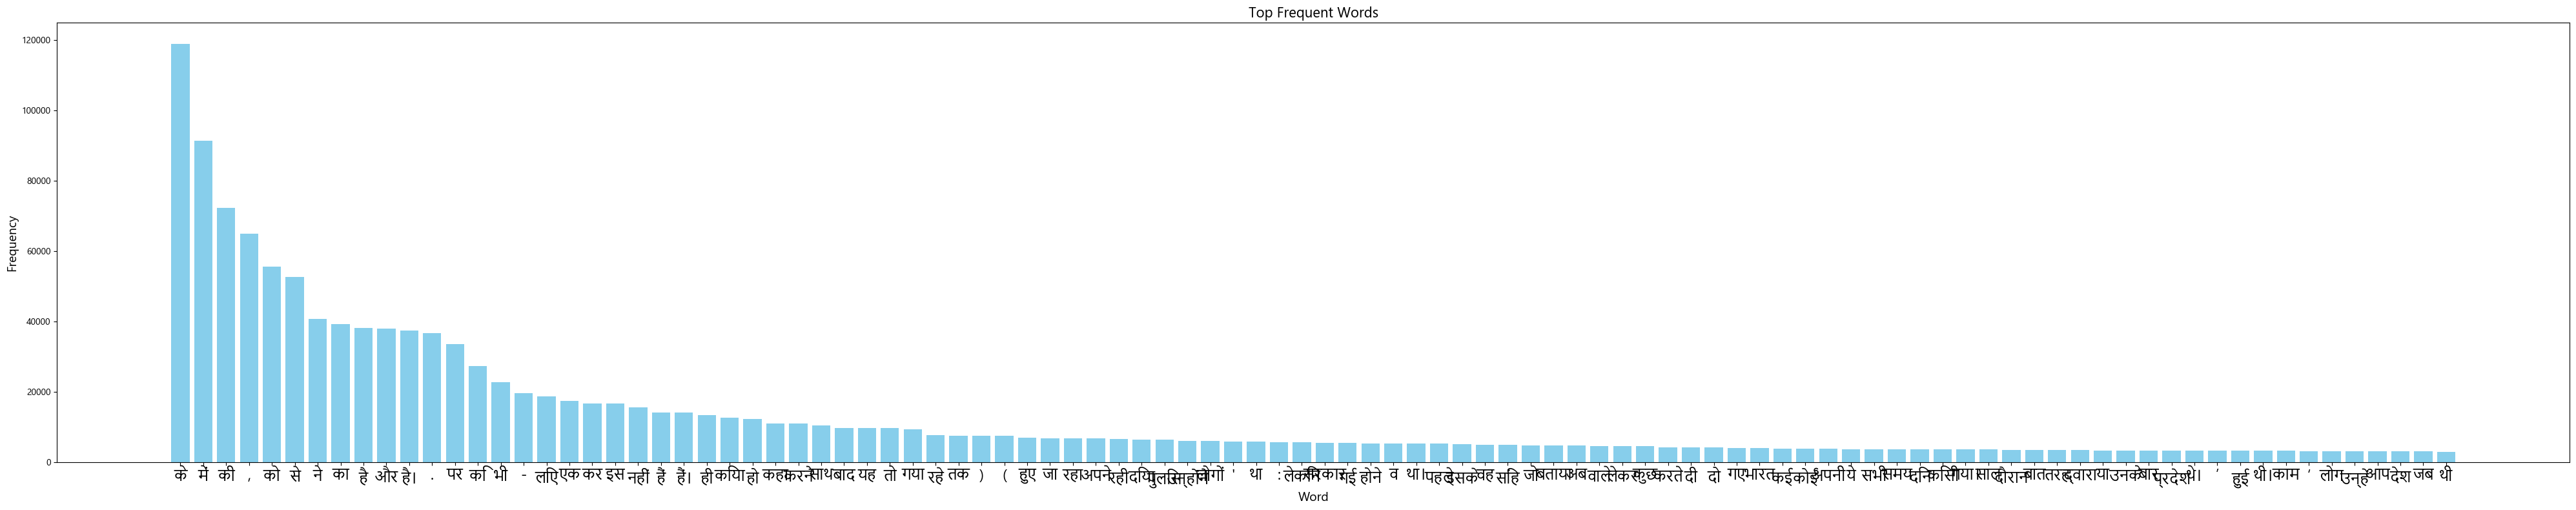

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# ✅ Use Hindi-compatible font
rcParams['font.family'] = 'Nirmala UI'   # Windows
# rcParams['font.family'] = 'Mangal'     # alternative on Windows
# rcParams['font.family'] = 'Noto Sans Devanagari'  # Linux/Mac

# Convert set -> (word, freq)
pairs = []
for s in lis:
    word = None
    freq = None
    for item in s:
        if isinstance(item, int):
            freq = item
        else:
            word = item
    pairs.append((word, freq))

# Separate words and freqs
words, freqs = zip(*pairs)

# Plot
plt.figure(figsize=(40, 8))   # ✅ much wider canvas for horizontal Hindi words
plt.bar(words, freqs, color='skyblue')

plt.xlabel("Word", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Top Frequent Words", fontsize=16)

# ✅ Keep words horizontal
plt.xticks(rotation=0, fontsize=17)

plt.tight_layout()
plt.show()


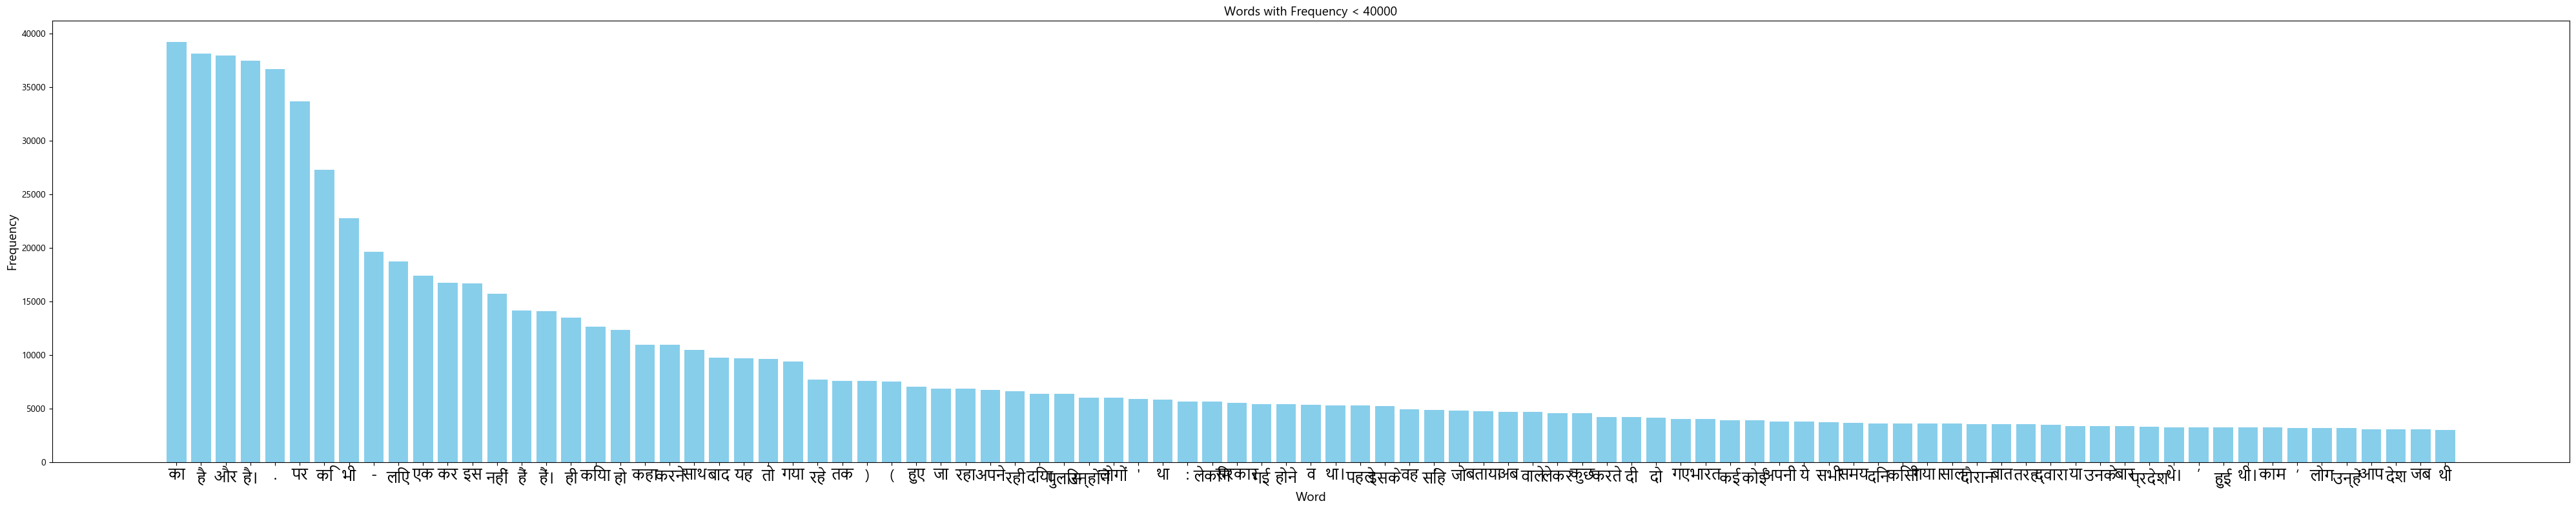

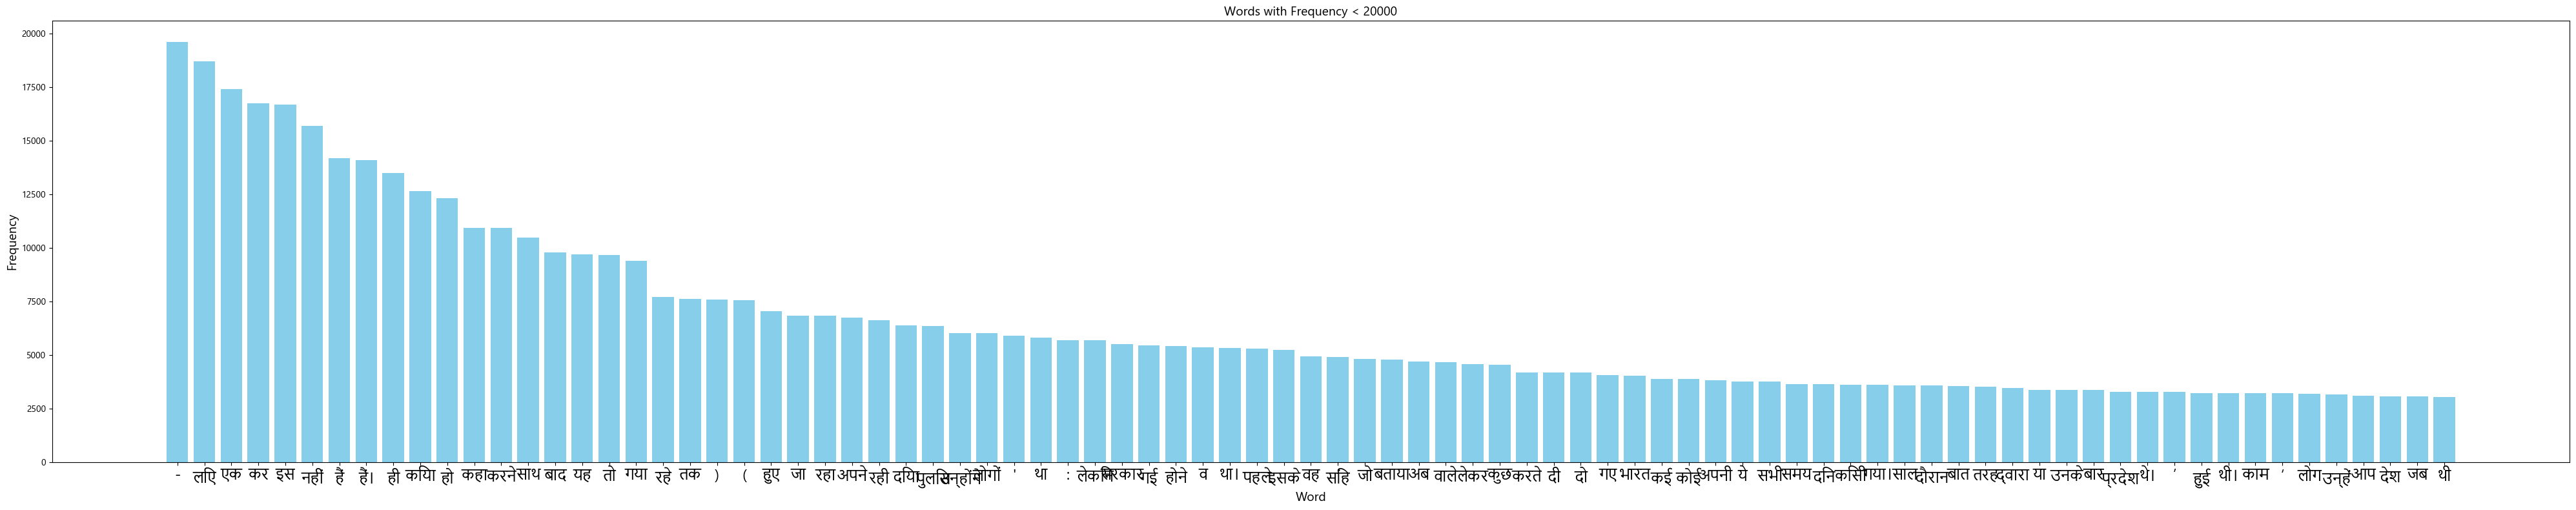

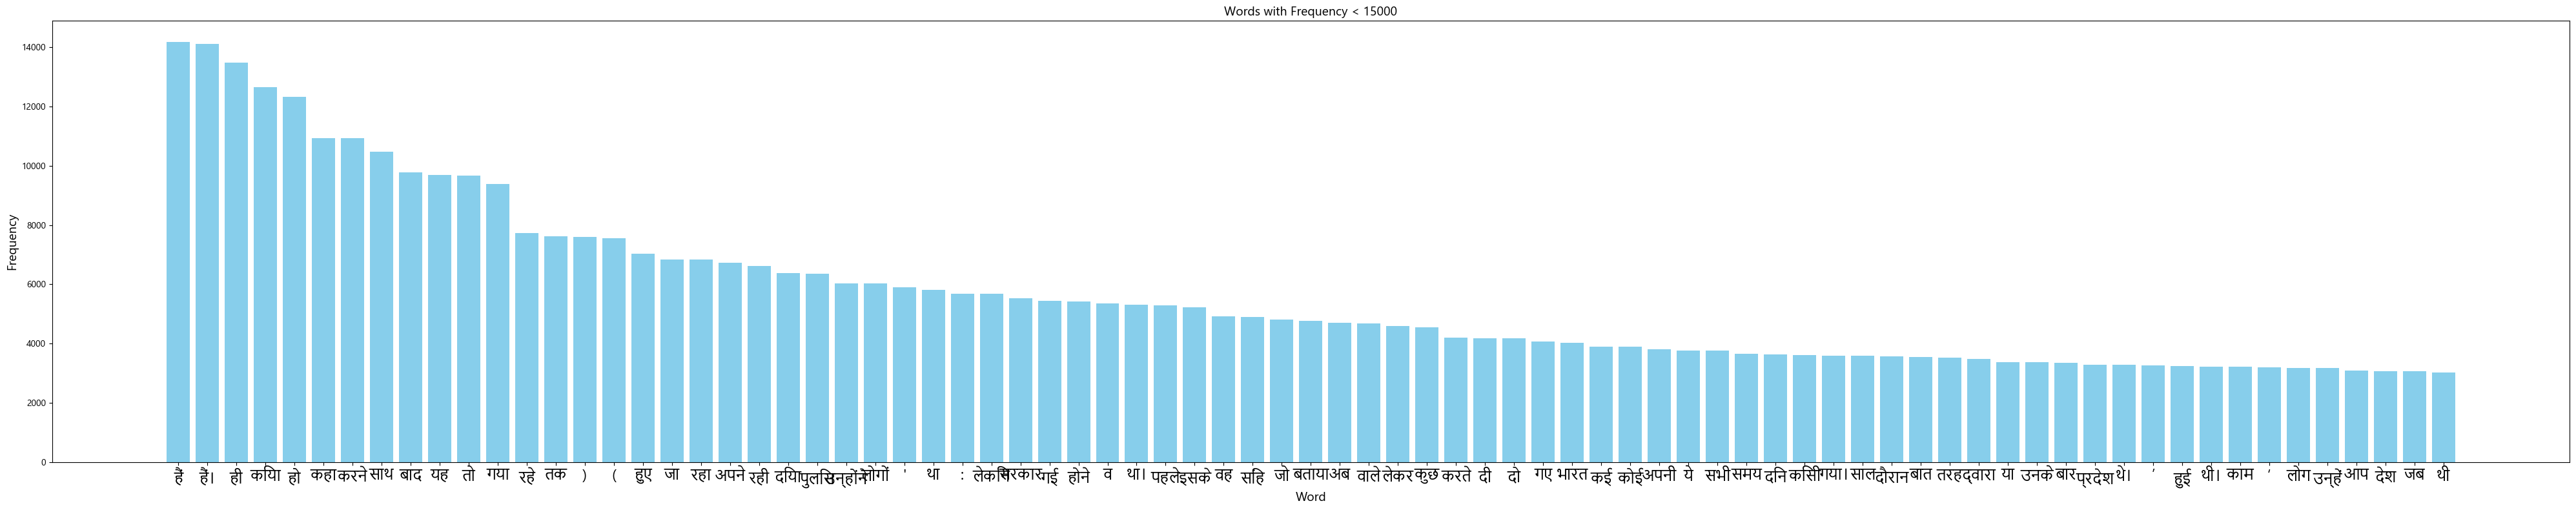

In [15]:
import matplotlib.pyplot as plt

# Example: you already have words, freqs from your previous step
pairs = []
for s in lis:
    word = None
    freq = None
    for item in s:
        if isinstance(item, int):
            freq = item
        else:
            word = item
    pairs.append((word, freq))

words, freqs = zip(*pairs)

# Define thresholds
thresholds = [40000, 20000, 15000]

for t in thresholds:
    # Filter based on threshold
    filtered = [(w, f) for w, f in zip(words, freqs) if f < t]

    if not filtered:
        print(f"No words with freq < {t}")
        continue

    fw, ff = zip(*filtered)

    

    plt.figure(figsize=(40, 8))   # ✅ much wider canvas for horizontal Hindi words
    plt.bar(fw, ff, color='skyblue')
    
    plt.xlabel("Word", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)

    plt.title(f"Words with Frequency < {t}", fontsize=14)
    # ✅ Keep words horizontal
    plt.xticks(rotation=0, fontsize=17)
    
    plt.tight_layout()
    plt.show()
